# **Sentiment Classification of Russia vs Ukraine Tweets**


---



Welcome to the Project of Sentiment Classification of Russia vs Ukraine Tweets

Kaggle Dataset Link: https://www.kaggle.com/datasets/towhidultonmoy/russia-vs-ukraine-tweets-datasetdaily-updated

In this project I have performed Natural Language Processing Techniques, such as:

1.   Sentiment Analysis
2.   Term Frequency - Inverse Document Frequency
3.   LDA (Latent Dirichlet Allocation) Topic Modeling


This project has been created by **Ahrar Bin Aslam**.


For more details:

Gmail: ahrarbaslam23@gmail.com

Linkedin: www.linkedin.com/in/ahrarbinaslam23



Importing all the necessary libraries

In [ ]:
import nltk
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')
!pip install contractions -q
import contractions
import re
from wordcloud import WordCloud

Reading the dataset using Pandas

In [ ]:
df=pd.read_csv('Dataset.csv')
df['tweet']

0        @nazijaeger__ @derwener @Anonymous9775 Russia ...
1        The Russia HAARP which could destroy USA in on...
2        Putin gives Steven Seagal Russia&amp;#8217;s O...
3        @MainelifeR @BaddCompani It’s ALWAYS PROJECTIO...
4        @Pottingpinks @mfa_russia @mod_russia @mil_his...
                               ...                        
10009    @wallacemick Its not Ukraine which investere w...
10010    @tom_username_ There were very dark rumors tha...
10011    @elonmusk If Russia lose the Rothschild are co...
10012    @RonFilipkowski Look forward to Russia liberat...
10013    @Lyla_lilas I read it yes. It is heartbreaking...
Name: tweet, Length: 10014, dtype: object

In [ ]:
data=df['tweet']
data

0        @nazijaeger__ @derwener @Anonymous9775 Russia ...
1        The Russia HAARP which could destroy USA in on...
2        Putin gives Steven Seagal Russia&amp;#8217;s O...
3        @MainelifeR @BaddCompani It’s ALWAYS PROJECTIO...
4        @Pottingpinks @mfa_russia @mod_russia @mil_his...
                               ...                        
10009    @wallacemick Its not Ukraine which investere w...
10010    @tom_username_ There were very dark rumors tha...
10011    @elonmusk If Russia lose the Rothschild are co...
10012    @RonFilipkowski Look forward to Russia liberat...
10013    @Lyla_lilas I read it yes. It is heartbreaking...
Name: tweet, Length: 10014, dtype: object

Installing Textacy for Text Preprocessing

In [ ]:
!pip install textacy -q
from textacy import preprocessing

In [ ]:
lemmatizer=WordNetLemmatizer()
stop_words=set(stopwords.words("english"))
def preprocess_tweets(text):
  text=contractions.fix(text)
  text=text.replace("\n", "")
  text=preprocessing.remove.accents(text)
  text=preprocessing.remove.brackets(text)
  text=preprocessing.remove.html_tags(text)
  text=preprocessing.remove.brackets(text)
  text=preprocessing.remove.punctuation(text)
  text=preprocessing.normalize.unicode(text)
  text=preprocessing.normalize.whitespace(text)
  text=preprocessing.replace.currency_symbo ls(text, "")
  text=preprocessing.replace.emails(text, "")
  text=preprocessing.replace.emojis(text, "")
  text=preprocessing.replace.hashtags(text, "")
  text=preprocessing.replace.numbers(text, "")
  text=preprocessing.replace.phone_numbers(text, "")
  text=preprocessing.replace.urls(text, "")
  text=preprocessing.replace.user_handles(text, "")
  text=text.lower()
  text=re.sub(r"http\S+", "", text)
  text=re.sub(r"#+", "", text)
  words=word_tokenize(text)
  words=[lemmatizer.lemmatize(word) for word in words if word not in stop_words]
  return words


In [ ]:
data=data.apply(preprocess_tweets)
data

0        [nazijaeger, derwener, anonymous9775, russia, ...
1        [russia, haarp, could, destroy, usa, one, fell...
2        [putin, give, steven, seagal, russia, order, f...
3        [mainelifer, baddcompani, always, projection, ...
4        [pottingpinks, mfa, russia, mod, russia, mil, ...
                               ...                        
10009    [wallacemick, ukraine, investere, war, russia,...
10010    [tom, username, dark, rumor, zelensky, regime,...
10011    [elonmusk, russia, lose, rothschild, coming, n...
10012    [ronfilipkowski, look, forward, russia, libera...
10013    [lyla, lilas, read, yes, heartbreaking, russia...
Name: tweet, Length: 10014, dtype: object

Sentiment Analysis using VADER

In [ ]:
sia=SentimentIntensityAnalyzer()
pos_comments=[]
neg_comments=[]
neu_comments=[]
for word1 in data:
  word1=" ".join(word1)
  sentiment_scores=sia.polarity_scores(word1)
  if sentiment_scores['compound']>=0.05:
    pos_comments.append(word1)
  elif sentiment_scores['compound']<=-0.05:
    neg_comments.append(word1)
  else:
    neu_comments.append(word1)

In [ ]:
pos_comments

Converting the list of Positive, Negative, and Neutral Tweets into Numeric Data

In [ ]:
pos_comments_length=len(pos_comments)
neg_comments_length=len(neg_comments)
neu_comments_length=len(neu_comments)

In [ ]:
pos_comments_length

3317

Classifying the tweets into Positive, Negative, and Neutral

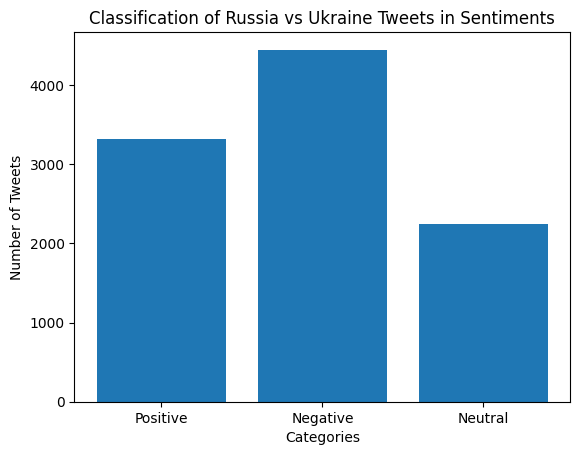

In [ ]:
categories=["Positive","Negative", "Neutral"]
values=[pos_comments_length, neg_comments_length, neu_comments_length]
plt.bar(categories, values)
plt.title("Classification of Russia vs Ukraine Tweets in Sentiments")
plt.xlabel("Categories")
plt.ylabel("Number of Tweets")
plt.savefig("Russia vs Ukraine Tweets Sentiment.png", dpi=400)
plt.show()

Converting the list into String as WordCloud accepts string format data

In [ ]:
pos_comments=" ".join(pos_comments)

Calculating Positive Sentiment Word Cloud

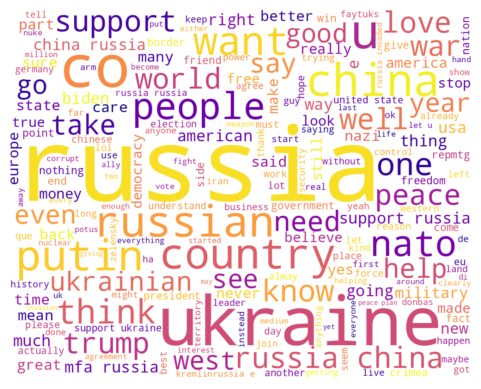

In [ ]:
positive_wordcloud=WordCloud(background_color="white", max_words=200, width=1000, height=800, colormap="plasma").generate(pos_comments)
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("Russia vs Ukraine Positive Sentiment WordCloud.png", dpi=400)
plt.show()

Converting the list into String as WordCloud accepts string format data

In [ ]:
neg_comments=" ".join(neg_comments)

In [ ]:
neg_comments

'russia haarp could destroy usa one fell swoop co jscs44w5ir r w worried nuclear pottingpinks mfa russia mod russia mil hist rf muzeypobedy rvio ru rushistorg ww2facts many millitary base russia outside border check usa biolabs left 🇺🇸 allow russia deploy weapon mexico cuba talkless biolab cjklein1 genflynn know governor would investigated fbi right fbi investigates hunter hillary russia hoax joe biden illegal money transaction mean fbi yea keep thinking equal justice law corrupt everyone know kathykrobot ronfilipkowski hmm zelensky coward behind dad russia invaded country putin ordered kill innocent civilian handed million dad graduation yup compare trump good thing ukraine edwardbrink87 sentdefender russia took bakhmut fortifying ever said russia losing war propaganda elonmusk ceo tesla warns prolongation russian war ukraine risk leading alliance two communist regime russia communist lol earth musk earth musk deal fact would maybe co djae1vks6m msnbc russia hoax hunter laptop benghaz

In [ ]:
pos_comments

'nazijaeger derwener anonymous9775 russia place satan rule well putin give steven seagal russia order friendship co gt8cc7qy6s riyadh🇸🇦 exit8 al yarmuk exit12 al malaz exit al mughrizat المغرزات new girl russia available location safe co m78qlgbkkq massage riyadh مبادل الرياض موجب الرياض سالب الرياض massage riyadh home taviduprix tigerlily5319 dc draino nato russia protecting sovereignty wake put russia shoe one support russia see truth biassed like united state imposed tariff steel aluminum import russia response one year anniversary invasion ukraine hope economically co yxva1qmebo breaking news belarus resistance fighter say blew russia prized million awac plane concentrated drone attack minsk russian airfield warinukraine co mftf2ty0sz vlad surkov find analysis interesting quote telegraphed dance china floating russia stacked peace proposal using refusal west accept reasoning arm sale seems like happen co hmgf0dvojo pro russia movement moldova protester rally nato friendly govt | ex

Calculating Negative Sentiment Word Cloud

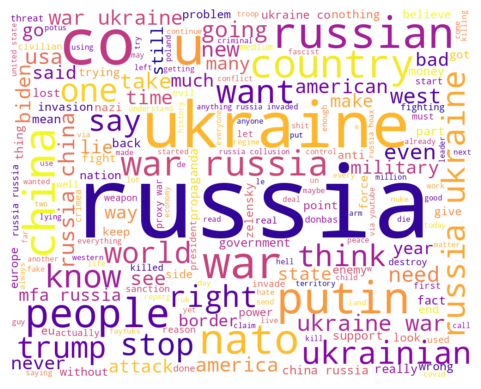

In [ ]:
negative_wordcloud=WordCloud(background_color="white", max_words=200, width=1000, height=800, colormap="plasma").generate(neg_comments)
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("Russia vs Ukraine Negative Sentiment WordCloud.png", dpi=400)
plt.show()

Calculating Positive Uni, Bi, and Tri-gram WordClouds using TF-IDF

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['le'] not in stop_words.
  warnings.warn(


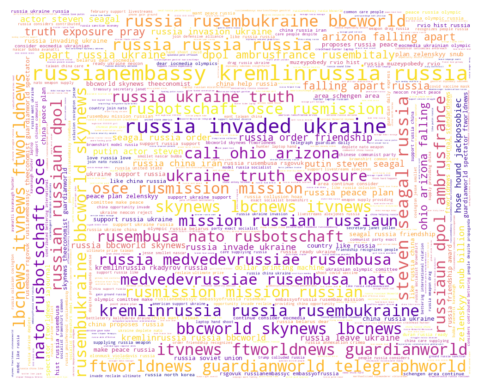

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
from nltk import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer
lemmatizer=WordNetLemmatizer().lemmatize
def f_WordNetLemmatizer_tokenize(document):
    tokens = [lemmatizer(w) for w in document.split() if len(w) > 3 and w.isalpha()]
    return tokens
pos_tweets=[pos_comments]

vectorizer = TfidfVectorizer( tokenizer=f_WordNetLemmatizer_tokenize, ngram_range = ((1,1)), stop_words="english" )
tfm = vectorizer.fit_transform(pos_tweets )
tfidf_weights_unigram_pos = [(word, tfm.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]

w_unigram_pos = WordCloud(width=1000, height=800, mode='RGBA', background_color='white', max_words=500, colormap="plasma").fit_words(dict(tfidf_weights_unigram_pos))
plt.imshow(w_unigram_pos, interpolation="bilinear")
plt.axis('off')
plt.savefig('Russia vs Ukraine Positive Unigram.png', dpi=400)

#Bigram
vectorizer = TfidfVectorizer( tokenizer=f_WordNetLemmatizer_tokenize, ngram_range = ((2,2)), stop_words="english" )
tfm = vectorizer.fit_transform( pos_tweets )
tfidf_weights_bigram_pos = [(word, tfm.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]

w_bigram_pos = WordCloud(width=1000, height=800, mode='RGBA', background_color='white', max_words=500, colormap="plasma").fit_words(dict(tfidf_weights_bigram_pos))

plt.imshow(w_bigram_pos, interpolation="bilinear")
plt.axis('off')
plt.savefig('Russia vs Ukraine Positive Bigram.png', dpi=400)


# Trigram

vectorizer = TfidfVectorizer( tokenizer=f_WordNetLemmatizer_tokenize, ngram_range = ((3,3)), stop_words="english" )
tfm = vectorizer.fit_transform( pos_tweets )
tfidf_weights_trigram_pos = [(word, tfm.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]

w_trigram_pos = WordCloud(width=1000, height=800, mode='RGBA', background_color='white', max_words=500, colormap="plasma").fit_words(dict(tfidf_weights_trigram_pos))

plt.imshow(w_trigram_pos, interpolation="bilinear")
plt.axis('off')
plt.savefig('Russia vs Ukraine Positive Trigram.png', dpi=400)

Calculating Negative Uni, Bi, and Tri-gram WordClouds using TF-IDF

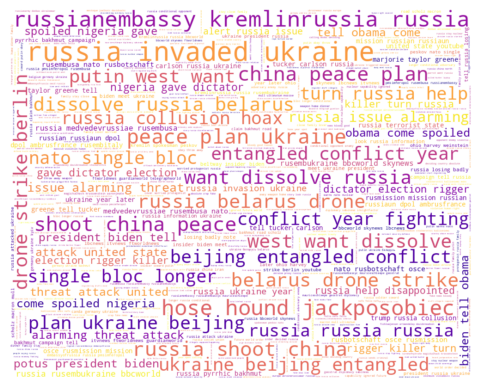

In [ ]:
neg_tweets=[neg_comments]
vectorizer = TfidfVectorizer( tokenizer=f_WordNetLemmatizer_tokenize, ngram_range = ((1,1)), stop_words="english" )
tfm = vectorizer.fit_transform(neg_tweets )
tfidf_weights_unigram_neg = [(word, tfm.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]

w_unigram_neg = WordCloud(width=1000, height=800, mode='RGBA', background_color='white', max_words=500, colormap="plasma").fit_words(dict(tfidf_weights_unigram_neg))
plt.imshow(w_unigram_neg, interpolation="bilinear")
plt.axis('off')
plt.savefig('Russia vs Ukraine Negative Unigram.png', dpi=400)

#Bigram
vectorizer = TfidfVectorizer( tokenizer=f_WordNetLemmatizer_tokenize, ngram_range = ((2,2)), stop_words="english" )
tfm = vectorizer.fit_transform( neg_tweets )
tfidf_weights_bigram_neg = [(word, tfm.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]

w_bigram_neg = WordCloud(width=1000, height=800, mode='RGBA', background_color='white', max_words=500, colormap="plasma").fit_words(dict(tfidf_weights_bigram_neg))

plt.imshow(w_bigram_neg, interpolation="bilinear")
plt.axis('off')
plt.savefig('Russia vs Ukraine Negative Bigram.png', dpi=400)


# Trigram

vectorizer = TfidfVectorizer( tokenizer=f_WordNetLemmatizer_tokenize, ngram_range = ((3,3)), stop_words="english" )
tfm = vectorizer.fit_transform( neg_tweets )
tfidf_weights_trigram_neg = [(word, tfm.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]

w_trigram_neg = WordCloud(width=1000, height=800, mode='RGBA', background_color='white', max_words=500, colormap="plasma").fit_words(dict(tfidf_weights_trigram_neg))

plt.imshow(w_trigram_neg, interpolation="bilinear")
plt.axis('off')
plt.savefig('Russia vs Ukraine Negative Trigram.png', dpi=400)

Topic Modeling using LDA (Latent Dirichlet Allocation)

In [ ]:
import gensim
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.matutils import corpus2csc
from sklearn.feature_extraction.text import CountVectorizer
dictionary=Dictionary(data)
dictionary.filter_extremes(no_below=5, no_above=0.5)
bow_corpus=[dictionary.doc2bow(text1) for text1 in data]

In [ ]:
ldamodel=LdaModel(bow_corpus,num_topics=10, id2word=dictionary, passes=20, alpha="auto", eta="auto")
topics=ldamodel.show_topics(num_topics=10, num_words=20, log=False, formatted=False)


In [ ]:
for topicid, topic in topics:
  print(f"The topic ID is {topicid}")
  print("Words", [word for word,_ in topic])

The topic ID is 0
Words ['e', 'de', 'que', 'da', 'typical', 'la', 'nao', 'se', 'na', 'ucrania', 'com', 'di', 'um', 'guerra', 'o', 'l', 'non', 'co', 'il', 'para']
The topic ID is 1
Words ['russian', 'ukrainian', 'soldier', 'next', 'coming', 'attacking', 'daily', 'ethnic', 'reason', 'voted', 'invaded', 'wake', 'ending', 'azov', 'holding', 'basis', 'ukraine', 'india', 'love', 'и']
The topic ID is 2
Words ['ukraine', 'co', 'war', 'u', 'putin', 'nato', 'want', 'would', 'since', 'year', 'support', 'think', 'say', 'get', 'west', 'biden', 'president', 'usa', 'state', 'right']
The topic ID is 3
Words ['ukraine', 'russian', 'country', 'know', 'one', 'back', 'people', 'like', 'would', 'every', 'civilian', 'far', 'go', 'crime', 'communist', 'area', 'stay', 'sent', 'turn', 'came']
The topic ID is 4
Words ['economy', 'excuse', 'maga', 'size', 'un', 'dc', 'draino', 'human', 'como', 'law', 'mais', 'international', 'con', '🇷🇺', 'peskov', 'cuba', 'saudi', 'sentdefender', 'noelreports', 'adversary']
The 

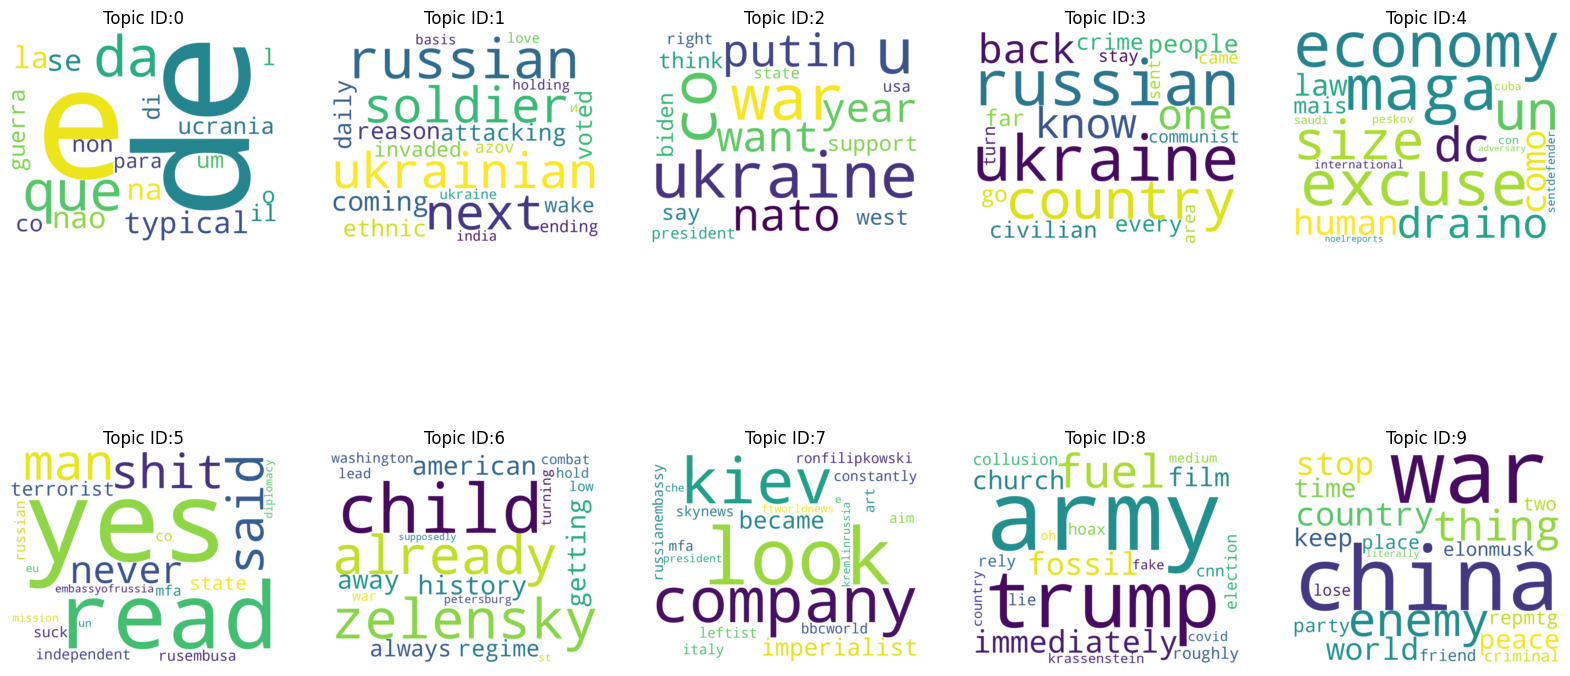

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
for topicid, topic in enumerate(ldamodel.print_topics(num_topics=10, num_words=20)):
  topic_words=" ".join([word.split("*")[1].strip() for word in topic[1].split("+")])
  wordcloud=WordCloud(background_color="white", colormap="viridis", width=1000, height=800).generate(topic_words)
  ax = axs[topicid // 5, topicid % 5]
  ax.imshow(wordcloud, interpolation="bilinear")
  ax.axis("off")
  ax.set_title(f"Topic ID:{topicid}")
plt.savefig("Topic Modeling Russia vs Ukraine.png", dpi=400)
plt.show()